# Data Wrangling of World Development Indicators Datasets

## Introduction
After looking through the initial data, we discovered that three datasets were needed in order to move forward with this project.  
- WDIData.csv had information on each of the 1600 indicators for each country dealing with world development over time.
- WDISeries.csv explained each indicator and placed them into a specific topic.
- WDICountry.csv had information on the country's region, income group and more.

Each dataset was also linked through certain unique values that could be used to combine the three.  The first step was to read in the data, combine them.  Then find a way to better analyze the 1600 indicators into a more condensed group.

## Read In and Merge Data

In [1]:
# WDIData has 1600 indicators for each country dealing with world development
# WDISeries explains each indicator and places them into a topic category
# WDICountry has country's region and income category

# Read in datasets
import numpy as np
import pandas as pd
data = pd.read_csv('WDI_csv/WDIData.csv')
series = pd.read_csv('WDI_csv/WDISeries.csv')
country = pd.read_csv('WDI_csv/WDICountry.csv')

After the datasets were read in, we had to take in the columns that were initially needed in WDICountry (as WDIData and WDISeries still needed to be reviewed) and prepare the datasets to be merged.  We found that `series code` and `indicator code` from WDISeries and WDIData had many matching unique values.  We merged and confirmed that these two columns were a match.  Next, we merged WDICountry to the dataset on the `country code` column.

In [2]:
# Prepare datasets for merge
country = country[['Country Code', 'Income Group', 'Region', 'Lending category', 'Other groups']]
series['Indicator Code'] = series['Series Code'] ###
series = series.rename(columns={'Indicator Name': 'Indicator Name_series'})

# Merge datasets by 'Indicator Code' and 'Country Code'
### Will confirm 'Indicator Code' and 'Series Code' match
ds = pd.merge(data, series, how='left', on='Indicator Code')
wdi = pd.merge(ds, country, how='outer', on='Country Code')


wdi.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63', 'Series Code',
       'Topic', 'Indicator Name_series', 'Short definition', 'Long definition',
       'Unit of measure', 'Periodicity', 'Base Period', 'Other notes',
       'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source lin

In [3]:
### Confirm 'Indicator Code' and 'Series Code' match
print((wdi['Indicator Code'] == wdi['Series Code']).sum())

422136


## Categorize the World Development Indicators

Now that we have merged the data and confirmed that `series code` and `indicator code` match, extracting the columns we need would be a great start.  But to make sure that we can actually move forward with the analysis, we felt it was best to start with condensing the 1600 indicators first.

We found that each of the indicators fell into 97 topics, but 97 was still too much.  We discovered that each topic had a common theme and extracted the words in those themes to be able to find 12 categories for the indicators.  We then created a new column, `category`, and placed each indicator into a category.

These categories are:
- Economic Policy & Debt 
- Education
- Environment
- Financial Sector
- Health
- Infrastructure
- Social Protection & Labor
- Poverty
- Private Sector & Trade
- Public Sector
- Gender
- World Bank, Global Development Finance

In [4]:
# 1600 indicators fall into 97 topics
print('Unique Topics: {}'.format(len(wdi.Topic.unique())))

Unique Topics: 97


In [5]:
# Consolidate topics into 12 categories, each category was a set of words before the ':' in topics
wdi['Category'] = ''
categories = ([
    'Economic Policy & Debt', 
    'Education', 
    'Environment', 
    'Financial Sector', 
    'Health', 
    'Infrastructure', 
    'Social Protection & Labor', 
    'Poverty', 
    'Private Sector & Trade', 
    'Public Sector', 
    'Gender', 
    'World Bank, Global Development Finance']
)

In [6]:
# Topics placed in categories by matching keywords
for category in categories:
    wdi['Category'] = wdi['Category'].mask(wdi['Topic'].str.startswith(category), category)
    
# Clean category and topic values
wdi['Topic'] = wdi['Topic'].str.replace('&', 'and')
wdi['Category'] = wdi['Category'].str.replace('&', 'and')

## Initial Inspection

After the initial clean up, we decided to learn a little more about our dataset in order to discover what we were working with.  We wanted to see how many of the indicators related to certain topics and categories.  And how many missing values we were working with.

In [7]:
# Number of indicators for the first 10 topics
(wdi['Topic'].value_counts()/264).astype(int).head(10)

Social Protection and Labor: Economic activity               77
Economic Policy and Debt: Official development assistance    64
Health: Population: Structure                                58
Private Sector and Trade: Business environment               54
Education: Participation                                     44
Environment: Emissions                                       42
Education: Inputs                                            42
Education: Outcomes                                          40
Health: Mortality                                            35
Public Sector: Policy and institutions                       34
Name: Topic, dtype: int64

In [8]:
# Number of indicators per category
(wdi['Category'].value_counts()/264).astype(int)

Economic Policy and Debt                  510
Health                                    239
Private Sector and Trade                  167
Social Protection and Labor               161
Education                                 147
Environment                               138
Public Sector                              96
Financial Sector                           54
Infrastructure                             41
Poverty                                    24
Gender                                     21
World Bank, Global Development Finance      1
Name: Category, dtype: int64

In [9]:
# Tons of null values
print(wdi.isnull().sum().sort_values(ascending=False).head(12))
wdi.shape

Other web links               422136
Unnamed: 63                   422136
Unnamed: 20                   422136
Related source links          421080
Related indicators            419760
Unit of measure               417384
Notes from original source    409464
Base Period                   402336
2018                          391889
1960                          383840
Other notes                   381744
1961                          380119
dtype: int64


(422136, 90)

After a brief look at the dataset we find that there are 422,136 rows and 90 columns.  Some columns outline the country, indicator, and track data over time.  Other columns group the countries in our dataset to lending categories, regions, etc., while some columns are not needed.  One thing is for certain, many of the columns are missing data 

## Clean the Columns

There seems to be tons of missing values, especially in the earlier years of the dataset.  We believe it's because many of the indicators that are now used were not used before.  Some of these indicators look at gender, social issues, child mortality rates, domestic abuse, and much more.  Something like 'Firms with female top manager (% of firms)' was likely not measured in several countries for several decades.  We will be looking into the missing data once we finish cleaning the skeleton on the dataset.

When it comes to columns, we looked at relevant information that could help us analyze the dataset.  Lending categories, indicator definitions, aggregation method, country, region, and timeline all made a lot of sense for analysis.  After that, we needed to standardize column names to make our analysis a little more efficient.

In [10]:
wdi.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63', 'Series Code',
       'Topic', 'Indicator Name_series', 'Short definition', 'Long definition',
       'Unit of measure', 'Periodicity', 'Base Period', 'Other notes',
       'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source lin

In [11]:
# Remove unneccessary columns and arrange columns
wdi = wdi.rename(
    columns={'Lending category': 'Lending Category', 'Long definition': 'Long Definition', 
    'Aggregation method': 'Aggregation Method', 'Other groups': 'Other Groups'}
    )
columns = [
    'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
    'Topic', 'Category', 'Income Group', 'Region', 'Aggregation Method',
    'Lending Category', 'Other Groups', '1960', '1961', '1962', '1963',
    '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', 
    '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', 
    '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
    '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
    '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
    '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
    '2018', 'Long Definition']
wdi = wdi[columns]

In [12]:
'There are now {} columns after the first drop.'.format(wdi.shape[1])

'There are now 71 columns after the first drop.'

In [13]:
# Standardize column names
wdi = wdi.rename(columns={
    'Country Name': 'country', 'Country Code':'country_code', 'Indicator Name': 'indicator', 
    'Indicator Code': 'indicator_code', 'Series Code': 'series_code', 'Topic': 'topic',
    'Category': 'category', 'Income Group': 'income_group', 'Region': 'region',
    'Aggregation Method': 'aggregation_method', 'Lending Category': 'lending_category',
    'Other Groups': 'other_groups', 'Long Definition': 'definition'})

## Handle Missing Data I

Now that the columns are cleaned, we dove a little deeper into our dataset.  We saw that `income group` had almost 20% missing data, but found that it was because the `country` column also grouped countries into several categories and regions.  When we removed any row where `income group` had no value, it left only countries.  We also removed any columns which had more than 50% of data missing as it would make our analysis much more difficult.

Although this dataset is a compilation of relevant, high-quality statistical data about global development; it still has much cleaning to do before we can draw inferences from it.

In [14]:
wdi.columns

Index(['country', 'country_code', 'indicator', 'indicator_code', 'topic',
       'category', 'income_group', 'region', 'aggregation_method',
       'lending_category', 'other_groups', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', 'definition'],
      dtype='object')

In [15]:
# Find how much data is missing in each column
# Function to look at missing rows per column
def missing(dataset):
    columns = dataset.columns
    print('MISSING ROWS per COLUMN')
    for column in columns:
        percentage = (dataset[column].isnull().sum() / len(wdi)) * 100
        print('{}: {}, {:0.2f}%'.format(column, dataset[column].isnull().sum(), percentage))
        
        
# Missing rows per column       
missing(wdi)

MISSING ROWS per COLUMN
country: 0, 0.00%
country_code: 0, 0.00%
indicator: 0, 0.00%
indicator_code: 0, 0.00%
topic: 0, 0.00%
category: 0, 0.00%
income_group: 75153, 17.80%
region: 75153, 17.80%
aggregation_method: 97416, 23.08%
lending_category: 193479, 45.83%
other_groups: 327795, 77.65%
1960: 383840, 90.93%
1961: 380119, 90.05%
1962: 377938, 89.53%
1963: 378052, 89.56%
1964: 377525, 89.43%
1965: 374831, 88.79%
1966: 375234, 88.89%
1967: 373503, 88.48%
1968: 373927, 88.58%
1969: 372125, 88.15%
1970: 329244, 77.99%
1971: 323010, 76.52%
1972: 320238, 75.86%
1973: 320613, 75.95%
1974: 319298, 75.64%
1975: 315397, 74.71%
1976: 313480, 74.26%
1977: 310148, 73.47%
1978: 310568, 73.57%
1979: 309765, 73.38%
1980: 304918, 72.23%
1981: 303006, 71.78%
1982: 301802, 71.49%
1983: 302024, 71.55%
1984: 301222, 71.36%
1985: 300049, 71.08%
1986: 299212, 70.88%
1987: 297810, 70.55%
1988: 298093, 70.62%
1989: 296332, 70.20%
1990: 271853, 64.40%
1991: 266794, 63.20%
1992: 262844, 62.27%
1993: 261485, 61

## Extract Countries Only
The `country` column featured regions and groups such as 'Arab World', 'East Asia & Pacific (excluding high income)', 'Lower middle income', etc.  We do not need these groups in our dataset as we will be making predictions relating to this in the future using `income group`.  After dropping the groups, we are left with 217 countries to analyze.

In [16]:
# Non-countries
for country in wdi.country.unique()[:20]:
    print(country)

Arab World
Caribbean small states
Central Europe and the Baltics
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (excluding high income)
East Asia & Pacific (IDA & IBRD countries)
Euro area
Europe & Central Asia
Europe & Central Asia (excluding high income)
Europe & Central Asia (IDA & IBRD countries)
European Union
Fragile and conflict affected situations
Heavily indebted poor countries (HIPC)
High income
IBRD only
IDA & IBRD total
IDA blend
IDA only
IDA total


In [17]:
# Missing values for `income group` are from regions in country categories
print(wdi['country'][wdi['income_group'].isnull()].value_counts().head(7))

Heavily indebted poor countries (HIPC)                  1599
Early-demographic dividend                              1599
Caribbean small states                                  1599
Europe & Central Asia                                   1599
Fragile and conflict affected situations                1599
Low & middle income                                     1599
Latin America & the Caribbean (IDA & IBRD countries)    1599
Name: country, dtype: int64


In [18]:
# Drop these groups from the country column using income group
wdi = wdi.dropna(subset=['income_group'])

In [19]:
# Confirm only countries are in the country column
print('Number of countries in the country column after dropping "countries": ', len(wdi.country.unique()))
print('\n')

for country in wdi.country.unique()[:15]:
    print(country)

Number of countries in the country column after dropping "countries":  217


Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain


## Drop Columns with 50% or More Missing Values

After dropping the regions and groups from the `country` column, we moved on to dropping all columns with over 50% or more missing data.  The aftermath left us with information pertaining from 2005 to 2016 which is okay since the world has taken a different step in world development.  With the prevalence of high speed internet, technological advancements and jobs that didn't exist just years before; the methods of development that worked before may be different from what works today (education, employment, diversity standards, etc.) and it will be nice to see what changes have taken place in recent history.

In [20]:
# Before drop
wdi.columns

Index(['country', 'country_code', 'indicator', 'indicator_code', 'topic',
       'category', 'income_group', 'region', 'aggregation_method',
       'lending_category', 'other_groups', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', 'definition'],
      dtype='object')

In [21]:
# Drop all columns with more than 50% of it's values missing
wdi = wdi[wdi.columns[wdi.isnull().mean() < 0.5]]

In [22]:
# After drop
wdi.columns

Index(['country', 'country_code', 'indicator', 'indicator_code', 'topic',
       'category', 'income_group', 'region', 'aggregation_method',
       'lending_category', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', 'definition'],
      dtype='object')

In [23]:
# Find how much data is missing in each column
missing(wdi)

MISSING ROWS per COLUMN
country: 0, 0.00%
country_code: 0, 0.00%
indicator: 0, 0.00%
indicator_code: 0, 0.00%
topic: 0, 0.00%
category: 0, 0.00%
income_group: 0, 0.00%
region: 0, 0.00%
aggregation_method: 80073, 23.08%
lending_category: 118326, 34.10%
2005: 164053, 47.28%
2006: 165115, 47.59%
2007: 161978, 46.68%
2008: 162823, 46.93%
2009: 161652, 46.59%
2010: 149402, 43.06%
2011: 156420, 45.08%
2012: 155571, 44.84%
2013: 159586, 45.99%
2014: 155871, 44.92%
2015: 160454, 46.24%
2016: 168065, 48.44%
definition: 0, 0.00%


In [24]:
print(wdi.shape)
'We are now left with {:.2f}% of rows and {:.2f}% of columns from the original dataset'.format(
    (wdi.shape[0] / 422136)*100, (wdi.shape[1] / 71)*100)

(346983, 23)


'We are now left with 82.20% of rows and 32.39% of columns from the original dataset'

After dropping all the unneccessary rows and columns, our dataset is now 346,983 rows and 23 columns.  We now have to see what to do with the remainder of the missing data.

## Handle Missing Data II

Now that we have dropped all columns with over 50% missing data and all non-countries in the `country` column, we need to inspect our dataset to see what's left to do with the remaining data that is missing.

After inspection we decided to group the indicators and see how many countries recorded data for that indicator each year.  If an indicator had 90% or more data recorded for all countries combined from 2005 to 2016, we kept that indicator.  We went from 1599 to 341 indicators, but our columns' null values significantly dropped from roughly 50% to roughly 10% or less.

We also lost 3 categories, 'Public Sector', 'Poverty' and 'World Bank, Global Development Finance' because of the lack of data they possessed.  'Poverty' was a surprise, but the information that was featured wasn't significant.  But more significant information related to poverty was featured in other categories.

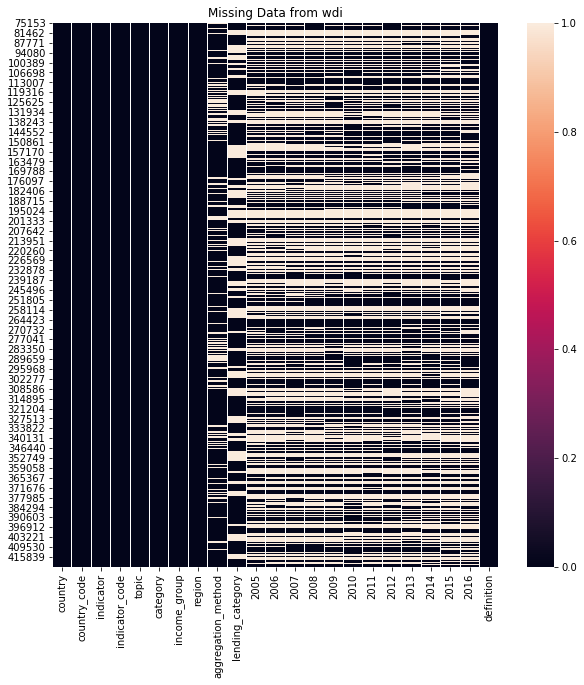

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
plt.subplots(figsize=(10,10))
sns.heatmap(wdi.isnull(), cbar=True)
plt.title('Missing Data from wdi')
plt.show()

<a id='Drop'></a>

## Drop Indicators with too Many Missing Values

In [26]:
# Drop indicators with too much missing values per row - missing values per indicator
# Group all indicators and count them in the year columns 
# Then find a percentage of usage rate to determine the threshold to drop null values

wdi.groupby('indicator').count().head()

,country,country_code,indicator_code,topic,category,income_group,region,aggregation_method,lending_category,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,definition
indicator,,,,,,,,,,,,,,,,,,,,,
"2005 PPP conversion factor, GDP (LCU per international $)",217,217,217,217,217,217,217,0,143,184,...,0,0,0,0,0,0,0,0,0,217
"2005 PPP conversion factor, private consumption (LCU per international $)",217,217,217,217,217,217,217,0,143,184,...,0,0,0,0,0,0,0,0,0,217
ARI treatment (% of children under 5 taken to a health provider),217,217,217,217,217,217,217,217,143,23,...,10,13,29,24,25,19,31,14,15,217
Access to clean fuels and technologies for cooking (% of population),217,217,217,217,217,217,217,217,143,189,...,189,189,189,189,189,189,189,189,189,217
Access to electricity (% of population),217,217,217,217,217,217,217,217,143,214,...,215,215,215,215,215,215,215,215,215,217


In [27]:
# Drop indicator by using sum of all the years and having a threshold

count_per_indicator = (2016-2005) * 217 # Number of countries
drop_indicators = []
for index, row in wdi.groupby('indicator').count().loc[:, '2005':'2016'].iterrows():
    if ((sum(row) / count_per_indicator) * 100) < 90:
        drop_indicators.append(index)
        
len(drop_indicators)

1258

In [28]:
# will use to find the difference of category counts after dropping indicators
cat_counts = wdi.category.value_counts().copy()

In [29]:
wdi = wdi[~wdi.indicator.isin(drop_indicators)]

In [30]:
len(wdi.indicator.unique())

341

In [31]:
print('Number of unique indicators that were dropped:')
(cat_counts - wdi.category.value_counts())/217
# `Public Sector`, `Poverty` and `World Bank, Global Development Finance` 
# didn't have enough information and were dropped

Number of unique indicators that were dropped:


Economic Policy and Debt                  421.0
Education                                 141.0
Environment                               102.0
Financial Sector                           46.0
Gender                                     20.0
Health                                    135.0
Infrastructure                             33.0
Poverty                                     NaN
Private Sector and Trade                  128.0
Public Sector                               NaN
Social Protection and Labor               111.0
World Bank, Global Development Finance      NaN
Name: category, dtype: float64

In [32]:
print('Number of unique indicators per category:')
wdi.category.value_counts()/217

Number of unique indicators per category:


Health                         104.0
Economic Policy and Debt        89.0
Social Protection and Labor     50.0
Private Sector and Trade        39.0
Environment                     36.0
Financial Sector                 8.0
Infrastructure                   8.0
Education                        6.0
Gender                           1.0
Name: category, dtype: float64

In [33]:
# Every column containing indicator data over time has roughly 90% non null values now
missing(wdi)

MISSING ROWS per COLUMN
country: 0, 0.00%
country_code: 0, 0.00%
indicator: 0, 0.00%
indicator_code: 0, 0.00%
topic: 0, 0.00%
category: 0, 0.00%
income_group: 0, 0.00%
region: 0, 0.00%
aggregation_method: 19096, 25.81%
lending_category: 25234, 34.10%
2005: 8525, 11.52%
2006: 8255, 11.16%
2007: 7983, 10.79%
2008: 7959, 10.76%
2009: 7859, 10.62%
2010: 7777, 10.51%
2011: 7644, 10.33%
2012: 7710, 10.42%
2013: 7709, 10.42%
2014: 7801, 10.54%
2015: 7980, 10.78%
2016: 9299, 12.57%
definition: 0, 0.00%


We are making progress with getting our dataset ready to analyze.  We will now move on to finding the income group for each country for each year in our dataset.

## Find Income Groups per Year 
In order to make a prediction model later down the line in this project, we must find what income group each country falls into for each year in our dataset.  The current data that we are working with only has the current income group for each country.  That is insufficient, so we went back onto the world bank website and found another dataset that features the income group for each country over several decades.  

This dataset is called OGHIST.xlsx

After reading in the dataset, we:
- Isolated the years we needed
- Replaced the letter representations of each income group with words
- Merged the data into our wdi dataset
- Delete any countries that don't have income group data

In [34]:
# Current count of income groups
wdi.income_group.value_counts()/341

High income            80.0
Upper middle income    56.0
Lower middle income    47.0
Low income             34.0
Name: income_group, dtype: float64

In [35]:
# Read in new dataset and isolate relevant information
income_groups = pd.read_excel('WDI_csv/OGHIST1.xlsx', skiprows=5)
income_groups = income_groups.iloc[5:220, [0, 1, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]]
income_groups.head()

,Unnamed: 0,Data for calendar year :,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,AFG,Afghanistan,L,L,L,L,L,L,L,L,L,L,L,L
6,ALB,Albania,LM,LM,LM,LM,UM,UM,LM,UM,UM,UM,UM,UM
7,DZA,Algeria,LM,LM,LM,UM,UM,UM,UM,UM,UM,UM,UM,UM
8,ASM,American Samoa,UM,UM,UM,UM,UM,UM,UM,UM,UM,UM,UM,UM
9,AND,Andorra,H,H,H,H,H,H,H,H,H,H,H,H


In [36]:
# Replace letter representations of income groups to words
def replace(col):
    return col.replace({
        'LM': 'Lower middle income', 
        'L': 'Low income', 
        'UM': 'Upper middle income', 
        'H': 'High income'
    })
income_groups = income_groups.apply(replace)

income_groups.head()

,Unnamed: 0,Data for calendar year :,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,AFG,Afghanistan,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income
6,ALB,Albania,Lower middle income,Lower middle income,Lower middle income,Lower middle income,Upper middle income,Upper middle income,Lower middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income
7,DZA,Algeria,Lower middle income,Lower middle income,Lower middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income
8,ASM,American Samoa,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income,Upper middle income
9,AND,Andorra,High income,High income,High income,High income,High income,High income,High income,High income,High income,High income,High income,High income


In [37]:
income_groups.columns

Index([              'Unnamed: 0', 'Data for calendar year :',
                             2005,                       2006,
                             2007,                       2008,
                             2009,                       2010,
                             2011,                       2012,
                             2013,                       2014,
                             2015,                       2016],
      dtype='object')

In [38]:
# Copy old dataset in case we need to go back
wdi_old = wdi.copy()

# Prepare and merge data
income_groups['country'] = income_groups['Data for calendar year :']
wdi = pd.merge(wdi, income_groups, how='outer', on='country')

# Rename income group columns
wdi = wdi.rename(
    columns={2005: 'ig_2005', 2006: 'ig_2006', 2007: 'ig_2007', 
             2008: 'ig_2008', 2009: 'ig_2009', 2010: 'ig_2010', 
             2011: 'ig_2011', 2012: 'ig_2012', 2013: 'ig_2013', 
             2014: 'ig_2014',  2015: 'ig_2015', 2016: 'ig_2016'}
)

# Remove `income_group` column since we now have a column for each year (ig_year)
wdi = wdi[
    ['country', 'country_code', 'indicator', 'indicator_code', 'topic', 
     'category', 'region', 'aggregation_method', 'lending_category', 
     '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', 
     '2015', '2016', 'definition', 'ig_2005', 'ig_2006', 'ig_2007', 'ig_2008',
     'ig_2009', 'ig_2010', 'ig_2011', 'ig_2012', 'ig_2013', 'ig_2014', 'ig_2015', 'ig_2016']
]


In [39]:
# Inspect dataset
wdi.head()

,country,country_code,indicator,indicator_code,topic,category,region,aggregation_method,lending_category,2005,...,ig_2007,ig_2008,ig_2009,ig_2010,ig_2011,ig_2012,ig_2013,ig_2014,ig_2015,ig_2016
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Environment: Energy production and use,Environment,South Asia,Weighted average,IDA,13.49,...,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,Environment: Energy production and use,Environment,South Asia,Weighted average,IDA,23.00,...,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income
2,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,Environment: Energy production and use,Environment,South Asia,Weighted average,IDA,13.00,...,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income
3,Afghanistan,AFG,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,Environment: Energy production and use,Environment,South Asia,Weighted average,IDA,74.00,...,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income
4,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (% of ...,NY.ADJ.DCO2.GN.ZS,Economic Policy and Debt: National accounts: A...,Economic Policy and Debt,South Asia,Weighted average,IDA,NaN,...,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income,Low income


In [40]:
# Drop any countries that don't have an income group
wdi = wdi[~wdi.ig_2007.isnull()]

We are now finished with this dataframe and can use it for the Data Storytelling portion of the project.  Below we will create a new, pivoted dataframe with the same information so that we may use it for the machine learning portion of our project.

## Pivot the Data for Machine Learning
The wdi dataset is now ready to analyze, but before we do that we want to also prepare the dataset to be used for machine learning models.  We will be using income groups of each country for each year as our target so we need to make sure that all of our indicators are aligned to show how they all affect each country's income group for each year that we have in our dataset.

Let's take a look at a rule of thumb for datasets - **For data to be tidy, it must have:**
- Each variable as a separate column.
- Each row as a separate observation.

For this we must:
- Pivot the indicators into columns
- Pivot the years into rows
- Stack our new datasets
- Sort the rows by country and year
- Make sure that there is a single row for each country for each year, with the income group of that country for that year

In [41]:
len(wdi.country.value_counts())

215

In [42]:
# Pivot the indicator columns
# Single row for each country for each year, income category can change from year to year.
# Copy the original wdi dataset since we will be manipulating this new one
pivots = []
pivot = {}
for i in range(12):
    added = i + 2005
    pivot[i] = wdi.pivot(index='country', columns='indicator', values= '{}'.format(added)).copy()
    pivot[i]['year'] = 2005 + i
    pivots.append(pivot[i])


# Merge pivots into a new dataframe
wdi_pivot = pd.concat(pivots, axis=0)

# Sort dataframe by country, then year
wdi_pivot = wdi_pivot.sort_values(['country', 'year'], ascending=[1,1])
wdi_pivot = wdi_pivot.reset_index()

wdi_pivot.head()

indicator,country,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),...,Urban population,Urban population (% of total),Urban population growth (annual %),"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",year
0,Afghanistan,13.49,23.000000,13.000000,74.000000,NaN,2.495481e+07,NaN,5.806829e+08,2.604448,...,5691823.0,22.703,4.768647,96.667002,88.143999,90.952999,3.220,11.183,8.559,2005
1,Afghanistan,14.81,28.228613,12.543863,80.042892,NaN,3.298676e+07,NaN,6.874334e+08,2.648119,...,5931413.0,22.907,4.123188,96.626999,88.017996,90.847000,3.260,11.312,8.666,2006
2,Afghanistan,15.99,33.748680,18.916223,81.800255,NaN,4.786236e+07,NaN,9.914580e+08,2.691791,...,6151939.0,23.113,3.650485,96.634996,87.805997,90.691002,3.252,11.519,8.817,2007
3,Afghanistan,17.44,42.400000,32.500000,89.900000,NaN,9.307607e+07,NaN,1.132399e+09,2.735462,...,6364968.0,23.320,3.404189,96.556997,87.686997,90.592003,3.329,11.643,8.920,2008
4,Afghanistan,18.84,44.854885,31.845157,85.354507,1.251926,1.552841e+08,11.46386,1.421933e+09,2.779134,...,6588859.0,23.528,3.457099,96.557999,87.415999,90.396000,3.328,11.902,9.107,2009


## Add Regions and Income Groups to New DataFrame
Now that our new dataset has been pivoted, we need to make sure we label the income group and region each country falls into for each year that is in our data.

In [43]:
# Stack the income groups
income_groups_stack = income_groups.stack()
income_groups_stack = income_groups_stack.reset_index()

# Create country column that is copied from 0 column
# Empty all non-country values
income_groups_stack['country'] = income_groups_stack[0][
    (income_groups_stack[0] != 'Low income') &
    (income_groups_stack[0] != 'Lower middle income') &
    (income_groups_stack[0] != 'Upper middle income') &
    (income_groups_stack[0] != 'High income')]

# Rename 0 column to income_group
income_groups_stack = income_groups_stack.rename(columns={0: 'income_group'})

# Forward fill country values downward to income groups
income_groups_stack['country'] = income_groups_stack['country'].fillna(method='ffill')
income_groups_stack.head(20)

,level_0,level_1,income_group,country
0,5,Unnamed: 0,AFG,AFG
1,5,Data for calendar year :,Afghanistan,Afghanistan
2,5,2005,Low income,Afghanistan
3,5,2006,Low income,Afghanistan
4,5,2007,Low income,Afghanistan
5,5,2008,Low income,Afghanistan
6,5,2009,Low income,Afghanistan
7,5,2010,Low income,Afghanistan
8,5,2011,Low income,Afghanistan
9,5,2012,Low income,Afghanistan


In [44]:
# Clean the stack
income_groups_stack = income_groups_stack[
    (income_groups_stack['level_1'] != 'Unnamed: 0') & 
    (income_groups_stack['level_1'] != 'Data for calendar year :') & 
    (income_groups_stack['level_1'] != 'country')
]

# Reshape dataframe
income_groups_stack = income_groups_stack.reset_index()
income_groups_stack = income_groups_stack[['income_group', 'country']]

In [45]:
# Remove error rows pertaining to country
wdi = wdi[wdi.country != 'North Macedonia']
wdi_pivot = wdi_pivot[wdi_pivot.country != 'North Macedonia']
income_groups_stack = income_groups_stack[income_groups_stack.country != 'North Macedonia']

In [46]:
# Convert the stack into a list
income_groups_stack = list(income_groups_stack['income_group'])

In [47]:
# Confirm length of income_group_stack and wdi_pivot
len(income_groups_stack)

2568

In [48]:
len(wdi_pivot)

2568

In [49]:
# Add regions column
regions = wdi[['country', 'region']]
regions = regions.drop_duplicates()
wdi_pivot = wdi_pivot.merge(regions, how='left', on='country')

# Add the stack to the pivoted dataframe
wdi_pivot['income_group'] = income_groups_stack

# Income group does vary from year to year for various countries
wdi_pivot.iloc[14:20]

,country,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),...,Urban population growth (annual %),"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",year,region,income_group
14,Albania,58.14,100.0,100.0,100.0,0.753375,8.267836e+07,9.078691,9.963315e+08,3.045469,...,1.492215,57.132000,53.249002,54.881001,41.918999,41.893002,41.903999,2007,Europe & Central Asia,Lower middle income
15,Albania,60.75,100.0,100.0,100.0,0.747768,9.680885e+07,9.286781,1.202302e+09,3.067987,...,1.435124,66.658001,52.441001,58.424000,32.766998,44.959999,39.828999,2008,Europe & Central Asia,Lower middle income
16,Albania,63.24,100.0,100.0,100.0,0.847386,1.004384e+08,10.167240,1.205096e+09,3.090506,...,1.473288,64.900002,50.718999,56.473001,34.757000,47.074001,42.076000,2009,Europe & Central Asia,Upper middle income
17,Albania,65.23,100.0,100.0,100.0,0.932935,1.101591e+08,11.951006,1.411151e+09,3.113024,...,1.609373,62.600000,49.828002,55.132999,36.946999,47.812000,43.298000,2010,Europe & Central Asia,Upper middle income
18,Albania,67.81,100.0,100.0,100.0,1.022553,1.318501e+08,11.355192,1.464162e+09,3.135542,...,1.787784,64.118002,55.577000,59.194000,34.728001,42.000999,38.922001,2011,Europe & Central Asia,Lower middle income
19,Albania,69.96,100.0,100.0,100.0,1.059772,1.295891e+08,11.503503,1.406650e+09,3.158061,...,1.848379,67.010000,57.317001,61.534998,32.007000,40.738998,36.939999,2012,Europe & Central Asia,Upper middle income


## Remove Countries with Error Value in Income Groups

In [50]:
# We notice an error with some of the country income groups
pd.concat([
    wdi_pivot[['country', 'year', 'income_group']][wdi_pivot.income_group == '..'].head(), 
    wdi_pivot[['country', 'year', 'income_group']][wdi_pivot.income_group == '..'].tail()
])

,country,year,income_group
324,British Virgin Islands,2005,..
325,British Virgin Islands,2006,..
326,British Virgin Islands,2007,..
327,British Virgin Islands,2008,..
328,British Virgin Islands,2009,..
2367,Turks and Caicos Islands,2008,..
2376,Tuvalu,2005,..
2377,Tuvalu,2006,..
2378,Tuvalu,2007,..
2379,Tuvalu,2008,..


In [51]:
# Drop any country that has '..' in income group in any year
drop_income_group = wdi_pivot.country[wdi_pivot.income_group == '..'].unique()
wdi_pivot = wdi_pivot[~wdi_pivot.country.isin(drop_income_group)]

In [52]:
len(wdi_pivot)/12

202.0

In [53]:
wdi_pivot.shape

(2424, 345)

In [54]:
wdi.shape

(72974, 34)

In [55]:
# wdi.to_csv('WDI_csv/wrangled/wdi.csv')
# wdi_pivot.to_csv('WDI_csv/wrangled/wdi_pivot.csv')

## Conclusion
To wrap up the data wrangling section, the following things were done to our dataset.
- Categorized indicators
- Dropped insufficient information
- Dropped unrelated columns
- Standardized column names
- Extracted countries
- Dropped columns with too much missing data
- Dropped indicators with too much missing data
- Found the income group of each country for each year
- Dropped incorrect data
- Pivoted the dataset for analysis and modeling

We are left with 202 countries and 341 world development indicators.